<font face='serif' size=4>
<span style="line-height: 1.25;">

# HW7 for Statistics with Meteorological Application
---
Student: 林之然 (B11209005, 大氣二), 蔡知諺（B11209014, 大氣二）

<font face='serif' size=4>
<span style="line-height: 1.25;">

### 1. What are your explanatory (X) and response (Y) variables?

- Explanatory Variables (X): $T_\text{Hengchun}$
- Response Variables (Y): $T_\text{Taipei}$

<font face='serif' size=4>
<span style="line-height: 1.25;">

### 2. Use scatter plot and box plot to describe the apparent characteristics of the response (Y)

<font face='serif' size=4>
<span style="line-height: 1.25;">

#### Plot Distribution

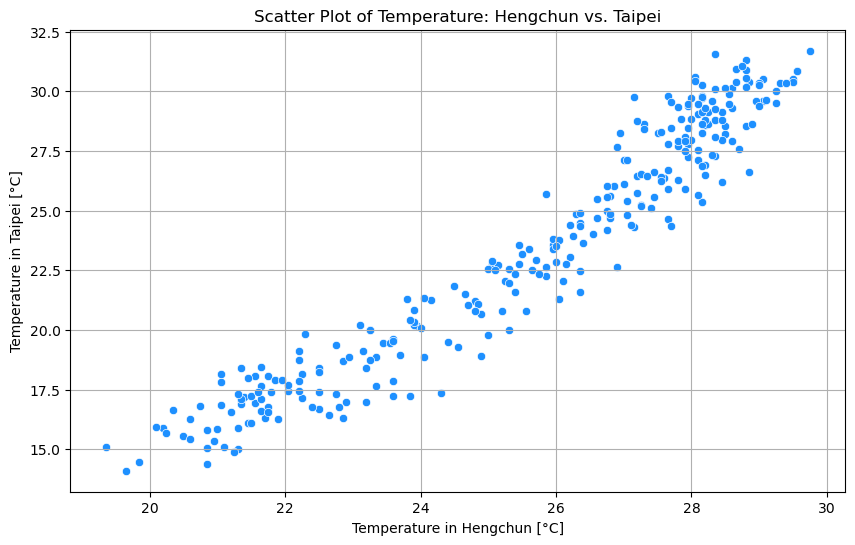

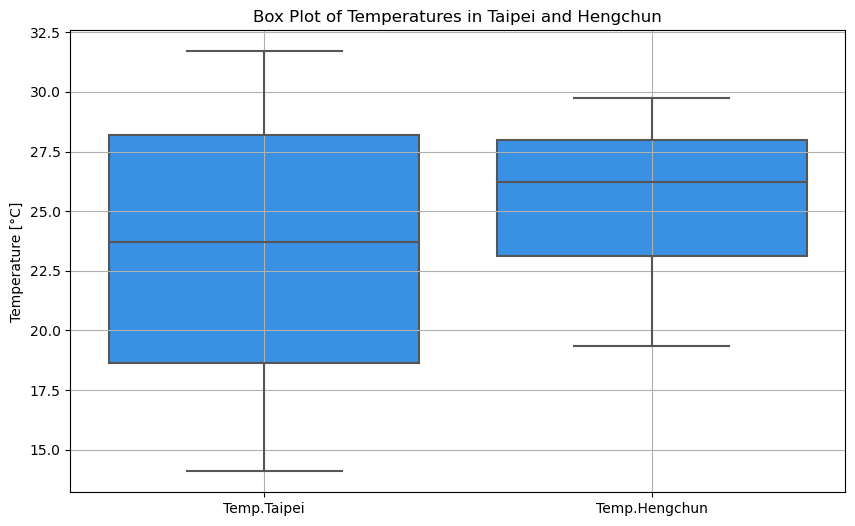

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the training data
training_data_path = 'Data_slr_training_hw.xlsx'
training_data = pd.read_excel(training_data_path)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp.Hengchun', y='Temp.Taipei', color='dodgerblue', data=training_data)
plt.title('Scatter Plot of Temperature: Hengchun vs. Taipei')
plt.xlabel('Temperature in Hengchun [°C]')
plt.ylabel('Temperature in Taipei [°C]')
plt.grid(True)
plt.show()

# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(color='dodgerblue', data=training_data[['Temp.Taipei', 'Temp.Hengchun']])
plt.title('Box Plot of Temperatures in Taipei and Hengchun')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()

<font face='serif' size=4>
<span style="line-height: 1.25;">

The scatter plot indicates a positive relationship between the temperatures at Hengchun and Taipei stations, suggesting that as the temperature in Hengchun increases, the temperature in Taipei tends to increase as well.

The box plots reveal the distribution of temperatures at both stations. It appears that temperatures in Hengchun tend to be higher and less variable compared to Taipei, as indicated by the median line within each box and the range of the whiskers.

<font face='serif' size=4>
<span style="line-height: 1.25;">

### 3. Build the least-squares linear model of your explanatory and response

<font face='serif' size=4>
<span style="line-height: 1.25;">

#### Fit Model

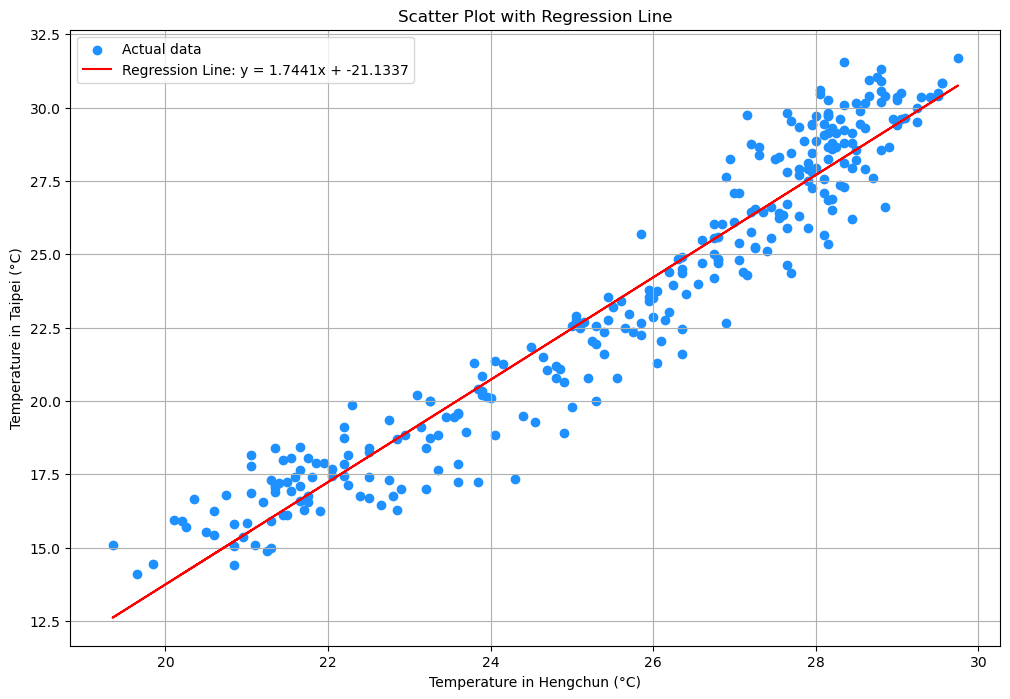

Regression Line: y = 1.7441 x + -21.1337


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X_train = training_data[['Temp.Hengchun']]
y_train = training_data['Temp.Taipei']

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_train)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Plot
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, color='dodgerblue', label='Actual data')
plt.plot(X_train, predictions, color='red', label=f'Regression Line: y = {slope:.4f}x + {intercept:.4f}')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Temperature in Hengchun (°C)')
plt.ylabel('Temperature in Taipei (°C)')
plt.legend()
plt.grid()
plt.show()

# Result
print(f"Regression Line: y = {slope:.4f} x + {intercept:.4f}")

<font face='serif' size=4>
<span style="line-height: 1.25;">

The least-squares linear model, based on the training set, between "Temp.Hengchun" (explanatory variable) and "Temp.Taipei" (response variable) is given by the equation:

$y=1.7441x−21.1337$

Where:

- $y$ is the temperature in Taipei,
- $x$ is the temperature in Hengchun.


<font face='serif' size=4>
<span style="line-height: 1.25;">

### 4. Please use R-squares to describe how strong is the linear relationship between your explanatory and response? How much of the variation in the response is explained by the explanatory variable?

In [4]:
# Predictions to calculate R-squared and correlation coefficient
predictions = model.predict(X_train)
r_squared = r2_score(y_train, predictions)
correlation_coefficient = np.corrcoef(y_train, predictions)[0, 1]

# Result
print(f"Correlation coeff. = {correlation_coefficient:.4f}")
print(f"R square = {r_squared:.4f}")

Correlation coeff. = 0.9624
R square = 0.9262


<font face='serif' size=4>
<span style="line-height: 1.25;">

The correlation coefficient is 0.9624 indicating a very strong positive linear relationship between the temperatures in Hengchun and Taipei.

The $R^2$ value is 0.9262, suggesting that approximately 92.62% of the variability in Taipei's temperature can be explained by the linear model based on Hengchun's temperature.

The $R^2$ value, also known as the coefficient of determination, indicates the proportion of the variance in the dependent variable (Temp.Taipei) that is predictable from the independent variable (Temp.Hengchun). An value of 0.9262 means that the model explains a very high proportion of the variation in the temperature in Taipei based on the temperature in Hengchun, which suggests the model fits the data very well.

<font face='serif' size=4>
<span style="line-height: 1.25;">

### 5. Please describe the estimated accuracy of your regression model based on the testing data set. (what kind of measurement/index do you want to use?) Please introduce the index you use to estimate the accuracy.

<font face='serif' size=4>
<span style="line-height: 1.25;">

#### Verification

In [5]:
# Load the verification data
verification_data_path = 'Data_slr_verification_hw.xlsx'
verification_data = pd.read_excel(verification_data_path)

# Prepare the verification data
X_verification = verification_data[['Temp.Hengchun']]
y_verification_actual = verification_data['Temp.Taipei']

# Use the model to predict temperatures in Taipei based on Hengchun temperatures
y_verification_predicted = model.predict(X_verification)

# Calculate Mean Squared Error (MSE) and R-squared for the verification set
mse_verification = mean_squared_error(y_verification_actual, y_verification_predicted)
r_squared_verification = r2_score(y_verification_actual, y_verification_predicted)

print(f"MSE = {mse_verification:.4f} [°C²]")
print(f"R square = {r_squared_verification:.4f}")

MSE = 1.3031 [°C²]
R square = 0.9442


<font face='serif' size=4>
<span style="line-height: 1.25;">

For the verification set, the Mean Squared Error (MSE) is 1.303, and the R-squared ($R^2$) value is 0.9442.

#### Introducing Indices
- **MSE:**
    An index of predictive accuracy, MSE quantifies the average squared difference between the observed actual outcomes and the outcomes predicted by the model. It offers a clear metric to gauge the error magnitude, useful in fine-tuning models and in problem areas where the scale of the error is of great concern.
    
- **$R^2$:**
    A descriptive index, $R^2$ measures the strength of the relationship between the model and the dependent variable. It is an indication of the proportion of the variance in the dependent variable that is predictable from the independent variables. This index is particularly helpful in assessing the explanatory power of the model and is often used to compare the fit of different predictive models.

#### Discussion of Results
- **MSE:** The relatively low MSE value of 1.303 signifies that the model's predictions generally align closely with the actual temperature values in Taipei. A lower MSE is indicative of the model's higher precision in forecasting the response variable. This suggests that when it comes to the average error per prediction, our model shows a high level of accuracy.
  
- **$R^2$:** An $R^2$ of 0.9442 for the verification set implies that about 94.42% of the variation in Taipei's temperature is accounted for by the linear model which uses Hengchun's temperature as an input. This high $R^2$ value reflects the model's robust explanatory power and confirms that the temperatures in Hengchun are strongly correlated with those in Taipei in the context of our model.

#### Comparason of MSE and $R^2$
- While MSE provides a direct measure of the model's prediction error in the same units as the response variable (squared), $R^2$ offers a proportionate representation of the model's variance explanation. $R^2$ is unitless and thus serves as a more universal indicator of model performance, allowing for comparisons across different studies and disciplines. It's worth noting that while a low MSE underscores the accuracy of predictions, a high $R^2$ highlights the model's capability to capture the underlying relationship between the variables. The two metrics complement each other: MSE gives us insight into the magnitude of prediction errors, and $R^2$ informs us about the proportion of explained variance, together providing a comprehensive picture of model performance.

In conclusion, the strong performance on both metrics for the verification set not only demonstrates the model’s accuracy but also its reliability in predicting Taipei's temperature based on the temperature data from Hengchun.